# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**


- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Открытие файла с данными и изучение общей информации

Для начала импортируем библиотеку Pandas для работы с таблицами, откроем датафрейм, чтобы просмотреть его содержимое, и отобразим 5 (по умолчанию) начальных строк датафрейма.

In [1]:
# импортируем библиотеку для работы с таблицами
import pandas as pd
# импортируем библиотеку для расчетов
import numpy as np
# импортируем библиотеку для отображения графиков
import matplotlib.pyplot as plt

In [2]:
# познакомимся с датафреймом
data = pd.read_csv('datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В результате отображения можно сделать вывод, что в данном датафрейме используется не стандартный разделитель для файлов csv (запятая), а символ табуляции `\t`. Поэтому для просмотра таблицы в привычном виде используем параметр `sep='\t'`. И просмотрим последние 10 строк представленного датафрейма.

In [3]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь датафрейм отображается в привычном для нас виде.

Проверим его размер.

In [4]:
data.shape

(23699, 22)

Представленная таблица состоит из 23699 строк и 22 столбцов.

Просмотрим общую информацию о таблице.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Предоставленная таблица содержит 23699 записей. Исходя из полученной информации, делаем вывод, что столбцы таблицы содержат строковые значения (`first_day_exposition`, `is_apartment`, `locality_name`), булевы значения (`studio`, `open_plan`), целочисленные значения (`total_images`, `rooms`, `floor`), оставшиеся столбцы представлены вещественными значениями. В данных присутствуют пропуски, всего 7 столбцов не содержат пропусков, в остальных пропуски распределились по-разному, самое большое количество пропусков в столбце `is_apartment` (23699 - 2775 = 20924).

Построим гистограмму для всех числовых столбцов датафрейма на одном графике.

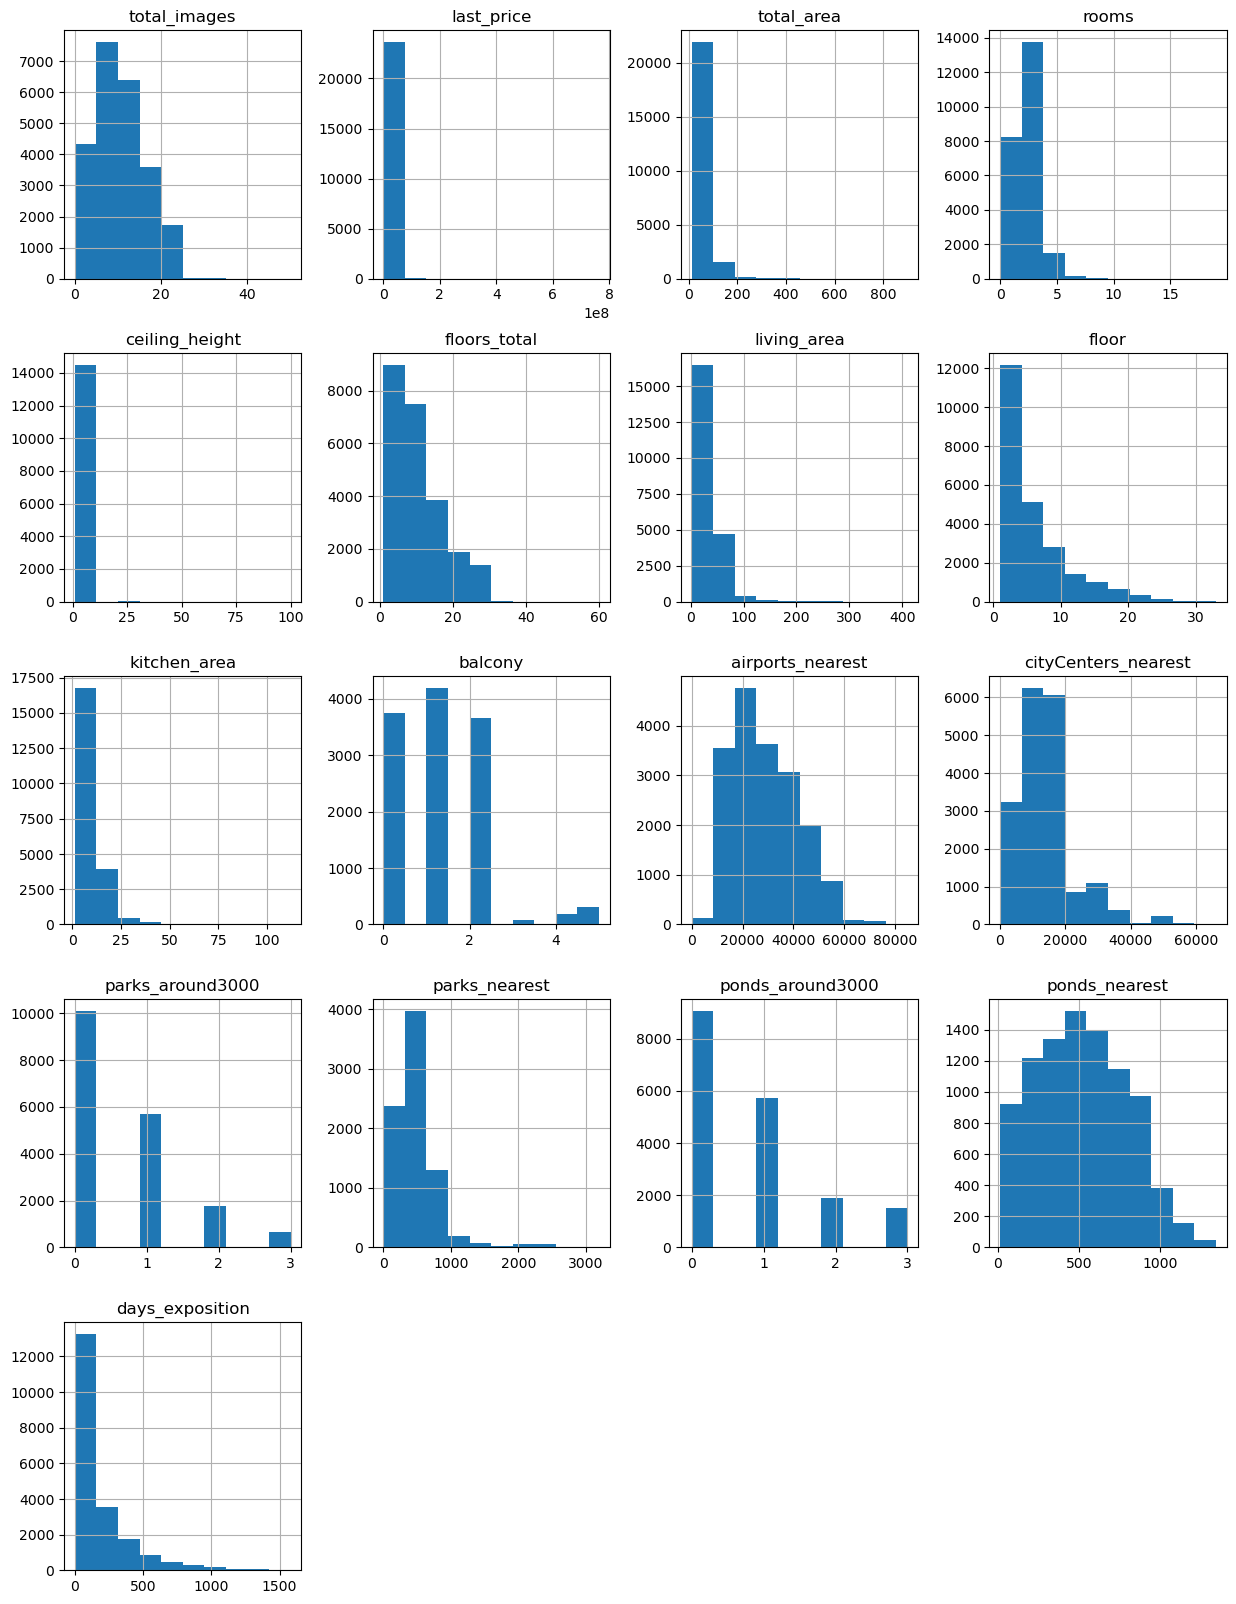

In [6]:
data.hist(figsize=(15, 20));

**По гистограммам можно сделать предварительные выводы:**

Количество изображений (`total_images`) в объявлениях о продаже квартир не превышает 35 штук, а в большинстве составляет от 5 до 15 фото, причем от 5 до 10 изображений - наиболее характерный показатель.

Гистограмма для столбца стоимости квартиры на момент снятия с публикации (`last_price`) не особенно показательна в данном случае, поскольку по умолчанию установлен неудобный для восприятия масштаб (пометка на гистограмме `1e8`), поэтому подробнее рассмотрим этот признак позже.

Площадь квартир (`total_area`) в основном укладывается до 200 кв.м., есть квартиры большей площади, но основная масса представленных квартир имеет площадь до 100 кв.м.

Количество комнат (`rooms`) в квартирах в основном составляет 2-3 комнаты, достаточное количество квартир имеет 1 комнату, в небольшом количестве представлены квартиры с 5 комнатами и больше.

Высота потолков (`ceiling_height`) на гистограмме представлена одним столбцом, что не очень информативно, детали посмотрим подробнее чуть ниже в описательной статистике.

Количество этажей (`floors_total`) в зданиях, в которых располагаются квартиры, в большинстве случаев составляет 5-10 этажей, достаточное количество зданий меньшей и большей этажности.

Жилая площадь (`living_area`) в большинстве выставленных на продажу объектов составляет до 50 кв.м., оставшаяся часть квартир представлена квартирами площадью до 100 кв.м. (большая доля) и превышающей 100 кв.м. (меньшая доля).

Большинство квартир расположено на этажах (`floor`) до 5-го, чуть меньше до 10-го, еще меньше квартир на этажах выше.

Площадь кухни (`kitchen_area`) большинства квартир составляет до 10 кв.м., но в объявлениях также представлены квартиры с кухнями большей площади.

В большинстве квартир один балкон (`balcony`), практически одинаковое количество квартир без балконов или с двумя балконами, есть квартиры с 3, 4 и более балконами, но их значительно меньше.

Большинство зданий, в которых расположены квартиры, находятся в районе 20 км от аэропортов (`airports_nearest`), значительное количество зданий расположены в районе 10 и 30 км от аэропортов, также есть здания, расположенные в 40 - 60 км и дальше.

Большинство квартир находятся на расстоянии 10 - 20 км от центра города (`cityCenters_nearest`), есть квартиры, расположенные практически в центре, незначительная часть квартир располагается далеко от центра города, вероятно, на окраине или за городом.

По числу парков на расстоянии 3 км от квартиры (`parks_around3000`) можно выделить четыре группы: квартиры без парков на таком расстоянии (самое большое количество), квартиры с одним парком (их чуть меньше), совсем немного квартир с тремя парками вблизи.

Признак расстояния до ближайшего парка в метрах (`parks_nearest`) говорит о том, что большинство квартир располагается от парка в 500 м и ближе, но в выборке этот признак указан для меньшего количества квартир по сравнению с признаком `parks_around3000`, разница составляет 10 тыс. объектов, поэтому данная информация не может считаться достоверной.

По числу водоемов на расстоянии 3 км от квартиры (`ponds_around3000`) можно выделить четыре группы: квартиры без водоемов на таком расстоянии (самое большое количество), квартиры с одним водоемом (их чуть меньше), совсем немного квартир с тремя водоемами вблизи.

Признак расстояния до ближайшего водоема в метрах (`ponds_nearest`) говорит о том, что практически все квартиры располагаются в непосредственной близости от водоема в 500 м и ближе, но в выборке этот признак указан для меньшего количества квартир по сравнению с признаком `ponds_around3000`: объектов с признаком `ponds_nearest` в 2 раза меньше, чем объектов с признаком `ponds_around3000`, поэтому данная информация не может считаться достоверной.

Длительность размещения (`days_exposition`) чуть больше 6 мес. (т.е. > 200 дней) у большинства объявлений, значительная доля объявлений располагалась на площадке дольше.

Все эти выводы требуют дальнейшего рассмотрения, подтверждения или опровержения.

Заметные на представленных выше гистограммах нюансы распределения зафиксируем в числах: посмотрим среднее, медиану, количество наблюдений в выборке и разброс значений.

In [7]:
data.describe().T   # перевернем таблицу для удобства просмотра (транспонирование)

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Стоит отметить, что визуальные наблюдения некоторым образом отличаются от того, что можно видеть в цифрах. Вероятно, в данных присутствуют выбросы или другие аномалии, с этим всем будем работать дальше.

**Промежуточные выводы по проблемам в данных:**

1. В данных присутствуют пропуски. Причины появления пропусков могут быть техническими (данные были повреждены при формировании или выгрузке файла), но также могут возникнуть и вследствие человеческого фактора (нежелание заполнять необязательные поля в объявлении). Также можно отметить, что пропуски в столбце (`balcony`), отображающем количество балконов, могут означать, что в квартире балконов нет.

2. Некорректные именования столбцов: названия не соответствуют формату snake_case (`cityCenters_nearest`, `parks_around3000`, `ponds_around3000`).

3. Типы данных некоторых столбцов нелогичны: в столбцах, отображающих количество этажей (`floors_total`), количество балконов (`balcony`), количество парков (`parks_around_3000`) и количество водоемов (`ponds_around_3000`) в радиусе 3 км данные представлены вещественным типом `float64`, хотя понятно, что эти значения должны быть целочисленными `int64`, в дальнейшем выполним замену.

4. Возможно, в данных присутствуют дубликаты. С этим тоже предстоит разобраться.

### Предобработка данных

Для начала исправим названия столбцов `cityCenters_nearest`, `parks_around3000`,` ponds_around3000` на корректные в соответствии с принятым форматом snake_case

In [8]:
data = data.rename(
    columns = {'cityCenters_nearest' : 'city_centers_nearest',
               'parks_around3000': 'parks_around_3000',
               'ponds_around3000': 'ponds_around_3000'}
)

Посмотрим, применились ли изменения.

In [9]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Да, изменения в силе: столбцы переименованы.

Теперь проверим, есть ли в столбцах пропуски, и узнаем их количество.

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как мы видим, в датафрейме достаточное количество пропусков. Заполним пропущенные значения там, где это возможно.

Сразу обратим внимание на то, что столбцы `floors_total` и `locality_name` имеют незначительное количество пропусков. Если удалить эти записи, все равно в датасете останется достаточное количество объектов для анализа. Причиной неуказания этих данных может быть то, что продавец решил не отпугивать потенциальных покупателей сразу при первом прочтении объявления или просто решил, что это неважная или само собой разумеющаяся информация. Удалим такие записи из таблицы.

In [11]:
data.dropna(subset = ['locality_name'], inplace=True)
data.dropna(subset = ['floors_total'], inplace=True)

Проверим, удалились ли записи.

In [12]:
print("Сумма пропусков в столбце 'locality_name':", data['locality_name'].isna().sum())
print("Сумма пропусков в столбце 'floors_total':", data['floors_total'].isna().sum())

Сумма пропусков в столбце 'locality_name': 0
Сумма пропусков в столбце 'floors_total': 0


Да, действительно, пропущенные записи в этих столбцах успешно удалены.

Рассмотрим признак `balcony` (количество балконов). Если продавец квартиры не указал количество, вероятно, балкона в квартире просто нет, поэтому пропущенное значение можно заменить на ноль.

In [13]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, выполнилась ли замена. В результате подсчета суммы пропусков получаем 0, значит код отработал правильно.

In [14]:
data['balcony'].isna().sum()

0

Пропущенные значения в столбце `ceiling_height` (высота потолков) заменим медианным значением высоты потолков квартир для соответствующего количества этажей в здании, в котором располагается квартира, или для соответствующего населенного пункта, если медианное значение для этажности не получится найти. Поскольку можно предположить, что здания в населенных пунктах строятся с учетом общей концепции застройки. Причиной неуказания высоты потолков может быть то, что владелец попросту не помнит точную высоту, а указывать "на глазок" не хотелось.

In [15]:
def fill_missing_ceiling_height(row):
    if pd.isna(row['ceiling_height']):
        median = data[(data['floors_total'] == row['floors_total']) & (~data['ceiling_height'].isna())]['ceiling_height'].median()
        if pd.isna(median):
            median = data[(data['locality_name'] == row['locality_name']) & (~data['ceiling_height'].isna())]['ceiling_height'].median()
        if pd.isna(median):
            median = 2.5   #  если выборке нет значений, то функция вернет значение по умолчанию, например, 2.5 метра
        return median
    else:
        return row['ceiling_height']

data['ceiling_height'] = data.apply(fill_missing_ceiling_height, axis=1)

Проверим, получилось ли выполнить замену. В результате подсчета суммы пропусков получаем 0, значит код отработал правильно.

In [16]:
data['ceiling_height'].isna().sum()

0

Жилая площадь - это сумма площадей жилых комнат в квартире. К ним относятся спальня, гостиная, детская, кабинет.

Обработаем данные по обычным квартирам, поскольку квартиры-студии имеют общее жилое пространство. Вычислим медианную жилую площадь квартир на основе информации о количестве комнат и их общей площади. Если медианное значение для жилой площади не получится найти, рассчитаем его для соответствующего количества этажей в здании. Причиной пропусков в этом столбце может быть то, что жилую площадь легко вычислить, и покупатель при просмотре объявления сам с этим справится.

In [17]:
def fill_living_area(row):
    if (row['studio'] == False) and (pd.isna(row['living_area'])):
        median = data[(data['total_area'] == row['total_area']) & (data['rooms'] == row['rooms']) & (~data['living_area'].isna())]['living_area'].median()
        if pd.isna(median):
            median = data[(data['floors_total'] == row['floors_total']) & (~data['living_area'].isna())]['living_area'].median()  
        if pd.isna(median):
            median = data[~data['living_area'].isna()]['living_area'].median()  #  если в выборке нет значений, то функция вернет значение по умолчанию, например, медиану жилой площади по всем объявлениям
        return median
    else:
        return row['living_area']

data['living_area'] = data.apply(fill_living_area, axis=1)

Проверим, получилось ли выполнить замену. В результате подсчета суммы пропусков получаем 7, это начит 7 значений не удалось заменить.

In [18]:
data['living_area'].isna().sum()

7

Поскольку у нас достаточно объектов для исследования, а причина того, что код не отработал для всех записей, мне пока не ясна, удалим эти записи, чтобы они не мешали дальнейшей работе.

In [19]:
data.dropna(subset=['living_area'], inplace=True)

Снова проверяем столбец на пропуски. Теперь их нет.

In [20]:
data['living_area'].isna().sum()

0

Для заполнения пропусков в столбце `kitchen_area` (площадь кухни) рассмотрим ситуацию для обычных квартир и квартир-студий: для студий площадь кухни заменим на ноль, поскольку пространство такой квартиры общее, а для обычных квартир вычтем жилую площадь из общей площади квартиры, получим площадь кухни.

In [21]:
def fill_kitchen_area(row):
    if (row['studio'] == False) and (pd.isna(row['kitchen_area'])):
        kitchen = row['total_area'] - row['living_area']
        return kitchen
    elif (row['studio'] == True) and (pd.isna(row['kitchen_area'])):
        return 0


data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.apply(fill_kitchen_area, axis=1)

Снова проверим, отработал ли код. Да, пропусков больше нет.

In [22]:
data['kitchen_area'].isna().sum()

0

Апартаменты – это нежилая коммерческая недвижимость площадью более 40 кв.м., которая внешне ничем не отличаются от квартиры. Там есть все необходимое для проживания людей: вода, электричество, санузел, место для кухни. В них можно жить, как и в обычных квартирах, но нельзя регистрироваться на постоянной основе.

Скорее всего, если продавец такой недвижимости не указал, что она является апартаментами, значит это обычная квартира и апартаментами не является. Заменим пропущенные значения на `False`.

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Снова проверим, отработал ли код. Да, и здесь пропусков больше нет.

In [24]:
data['is_apartment'].isna().sum()

0

Посмотрим общее количество пропусков в таблице на данном этапе. Осталось обработать данные о расположении квартиры и количество дней размещения объявления о продаже.

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5521
city_centers_nearest     5498
parks_around_3000        5497
parks_nearest           15529
ponds_around_3000        5497
ponds_nearest           14526
days_exposition          3169
dtype: int64

Пропуски в столбце `days_exposition` означают, что кварира не продана, поэтому эти пропуски заполнять или удалять не нужно.

Количество пропусков в столбце `ponds_around_3000` (число водоемов в радиусе 3 км) равно количеству пропусков в столбце `parks_around_3000` (число парков в радиусе 3 км), а именно 5497. Можно сделать вывод, что водоемы и парки в радиусе 3 км отсутствуют единовременно. Парки очень часто строятся около водоемов. Поэтому данное наблюдение логично.

Заменим NaN на 0 в обоих столбцах, поскольку можно предположить, что парков и водоемов в радиусе 3 км нет.

In [26]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Снова проверим, получилась ли замена. Да, значения пропусков равны нулю.

In [27]:
print("Пропуски в поле 'ponds_around_3000':", data['ponds_around_3000'].isna().sum())
print("Пропуски в поле 'parks_around_3000':", data['parks_around_3000'].isna().sum())

Пропуски в поле 'ponds_around_3000': 0
Пропуски в поле 'parks_around_3000': 0


Столбцы `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` содержат картографические данные, поэтому не будем заполнять в них пропуски, поскольку не получится достоверно восстановить пропущенные данные.

Теперь обратим внимание на типы данных в столбцах. Как мы уже упоминали выше, стоит изменить тип данных в столбцах `balcony`, `floors_total`, `parks_around_3000` и `ponds_around_3000`, поскольку данные в них выражены вещественными числами, а не целыми, как это кажется логичным (не бывает полтора балкона или девять с половиной этажей в здании, то же самое можно сказать и о парках, и водоемах).

Тип данных даты публикации `first_day_exposition` стоит поменять на тип datetime64.

In [28]:
columns_to_change = ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']


for column in columns_to_change:
    data[column] = data[column].astype('int', errors='ignore')
    
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, изменились ли типы данных.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23558 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23558 non-null  int64         
 1   last_price            23558 non-null  float64       
 2   total_area            23558 non-null  float64       
 3   first_day_exposition  23558 non-null  datetime64[ns]
 4   rooms                 23558 non-null  int64         
 5   ceiling_height        23558 non-null  float64       
 6   floors_total          23558 non-null  int32         
 7   living_area           23558 non-null  float64       
 8   floor                 23558 non-null  int64         
 9   is_apartment          23558 non-null  bool          
 10  studio                23558 non-null  bool          
 11  open_plan             23558 non-null  bool          
 12  kitchen_area          23558 non-null  float64       
 13  balcony         

Теперь проверим датафрейм на наличие дубликатов.

In [30]:
print('Количество дубликатов в датафрейме:', data.duplicated().sum())

Количество дубликатов в датафрейме: 0


Явных дубликатов в предоставленном датафрейме нет.

Теперь стоит проверить датафрейм на наличие неявных дуюликатов. Очевидно, что они могут быть в названиях населенных пунктов, поскольку люди имеют обыкновение называть населенные пункты по-разному.

In [31]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что в данных присутствуют два варианта написания слова "поселок": через "е" и через "ё". Приведем к одному варианту написания через "е".

In [32]:
uncorrect_data = data['locality_name'].str.contains('посёлок')
data.loc[uncorrect_data, 'locality_name'] = data.loc[uncorrect_data, 'locality_name'].str.replace('посёлок', 'поселок')
# и проверим, остались ли слова с буквой ё
print('Количество слов "посёлок" с "ё":', data['locality_name'].str.contains('посёлок').sum())

Количество слов "посёлок" с "ё": 0


Еще раз посмотрим уканильные значения столбца `locality_name`.

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Напишем код для приведения названий населенных пунктов к единообразному написанию.

In [34]:
data['locality_name'] = data['locality_name'].replace({'Мурино': 'поселок Мурино',
                                                       'Кудрово': 'деревня Кудрово',
                                                       'деревня Фёдоровское': 'городской поселок Фёдоровское', # по карте это одно и то же
                                                       'Никольское': 'село Никольское',
                                                       'городской поселок Рощино': 'поселок городского типа Рощино',
                                                       'поселок городского типа Павлово': 'село Павлово',  # по карте это одно и то же
                                                       'городской поселок Павлово': 'село Павлово',  # по карте это одно и то же
                                                       'городской поселок Советский': 'поселок городского типа Советский',
                                                       'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
                                                       'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
                                                       'деревня Зимитицы': 'поселок Зимитицы',
                                                       'поселок Рябово': 'поселок городского типа Рябово',
                                                       'городской поселок Мга': 'поселок городского типа Мга',
                                                       'городской поселок Назия': 'поселок городского типа Назия',
                                                       'поселок станции Приветнинское': 'поселок при железнодорожной станции Приветнинское',
                                                       'Любань': 'поселок Любань',
                                                      })

Проверим, правильно ли выполнился код. Видим, что неявных дубликатов больше нет.

In [35]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок 

Посмотрим получившийся датафрейм.

In [36]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,54.00,9,False,False,False,105.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,34.65,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


**Выводы по предобработке данных:**

Пропуски в столбцах могли быть связаны как с техническими неполадками, так и возникать вследствие человеческого фактора (нежелание заполнять продавцом квартиры всю информацию о ней). 

Для заполнения большинства пропусков в количественных переменных было выбрано медианное значение, среднее значение могло бы некорректно охарактеризовать данные вследствие присутствия выбросов. Некоторые пропуски были заполнены нулями, что показалось мне возможным в данном случае, картографические данные и дни размещения объявлений изменениям не подвергались, поскольку их изменение приведет к недостоверности данных, некоторые строки (незначительное количество записей) были удалены из датафрейма для облегчения дальнейшего анализа. 

Была проведена работа с неявными дубликатами в названиях населенных пунктов для обеспечения объективности наблюдений, явных дубликатов выявлено не было.

Также было выполнено преобразование типов данных некоторых столбцов для более логичного отражения данных.

### Выполнение вычислений и добавление в таблицу новых столбцов

Добавим в датафрейм новые столбцы в соответствии с поставленной задачей.

In [37]:
# цена одного кв.м. вычисляется путем деления стоимости объекта на его общую площадь
# затем нужно округлить значение до двух знаков после запятой

data['price_per_meter'] = (data['last_price'] / data['total_area']).round(2)

In [38]:
# добавим в датафрейм день недели, месяц и год публикации объявления о продаже квартиры

data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [39]:
# добавим категорию расположения квартир по этажам (значения этажей — "первый", "последний", "другой")

def get_category_by_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'
    

data['category_by_floor'] = data.apply(get_category_by_floor, axis=1)

In [40]:
# расстояние до центра города переведем из м в км и округлим до ближайших целых значений

def convert_to_km_and_round(value):
    if np.isnan(value):
        return np.nan
    km_value = value / 1000
    rounded_value = round(km_value)
    return rounded_value

data['city_centers_nearest_km'] = data['city_centers_nearest'].apply(convert_to_km_and_round)

Посмотрим, добавились ли в датафрейм столбцы, и как он теперь выглядит.

In [41]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,category_by_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,Другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,54.00,9,False,False,False,105.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,Другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,Другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017,Другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,34.65,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019,Другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018,Другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,Другой,15.0


Необходимые столбцы добавились, можно продолжать работу.

### Исследовательский анализ данных

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалим их. Попробуем обработать аномалии в столбцах, если они есть. Если природа аномалий понятна и данные действительно искажены, то восстановим корректные значения. В противном случае удалим редкие и выбивающиеся значения.

Рассмотрим следующие параметры:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка.

**Параметр "общая площадь"**

In [42]:
# изучим параметр total_area (общая площадь)
data['total_area'].describe()

count    23558.000000
mean        60.333091
std         35.657309
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

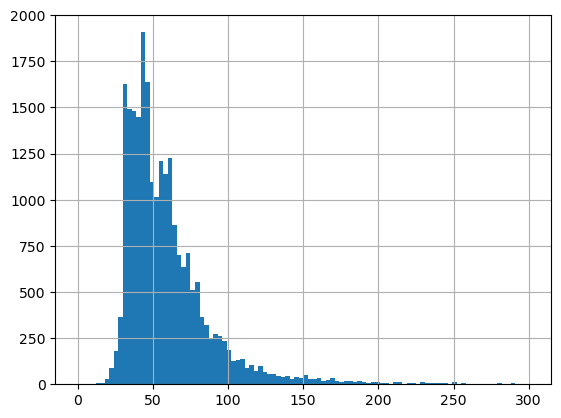

In [43]:
# построим его гистограмму
data['total_area'].hist(bins=100, range=(0, 300));

Больше всего в объявлениях представлены квартиры общей площадью от 25 до 50 кв.м., значительная часть объявлений представлена квартирами от 75 до 100 кв.м, квартиры площадью 100 кв.м. имеются в продаже, а вот выше 125 кв.м - это уже редкость. Квартиры площадью 200 кв.м и больше представлены в единичных объявлениях.

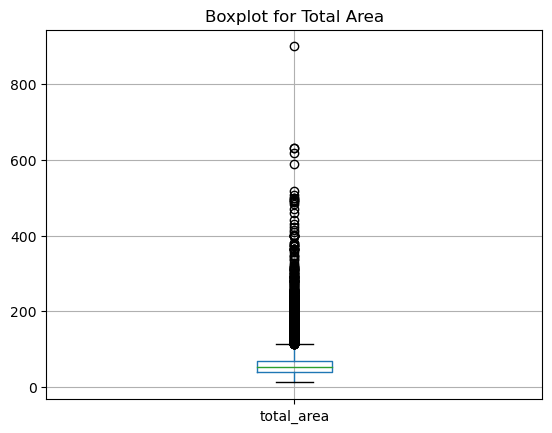

In [44]:
# построим график "ящик с усами", чтобы посмотреть выбросы

data.boxplot(column='total_area')
plt.title('Boxplot for Total Area')
plt.show();

По этому графику видно, что примерно после площади 100 кв.м. тянется длинный хвост единичных квартир большой площади. Исходя из данного графика, можно смело отбросить из данных квартиры площадью выше 200 кв.м. (там густота хвоста уменьшается), поскольку эти значения очень влияют на среднее значение и медиану.

На данном этапе датафрейм состоит из 23558 строк.

In [45]:
data.shape

(23558, 28)

Выполним удаление.

In [46]:
data = data.query('total_area <= 200')

Снова проверим размер датафрейма: видим, что удалилось не так много записей (226 объектов).

In [47]:
data.shape

(23332, 28)

**Параметр "жилая площадь"**

In [48]:
# изучим параметр living_area (жилая площадь)
data['living_area'].describe()

count    23332.000000
mean        33.155183
std         17.208463
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

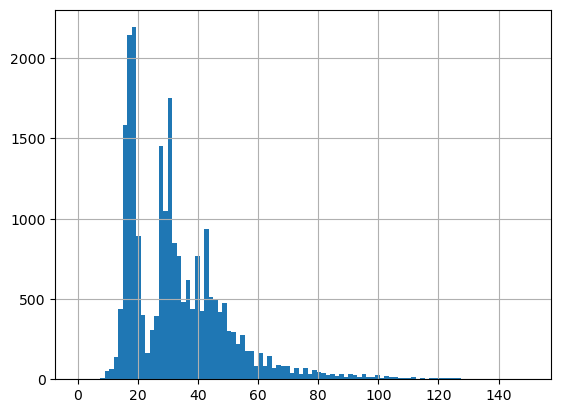

In [49]:
# построим его гистограмму
data['living_area'].hist(bins=100, range=(0, 150));

На гистограмме присутствуют несколько пиков: значительное количество квартир имеет жилую площадь около 20 кв.м., чуть меньше квартир - около 30 кв.м, представлено некоторое количество квартир площадью от 40 до 60 кв.м. Другие значения жилой площади представлены единичными квартирами.

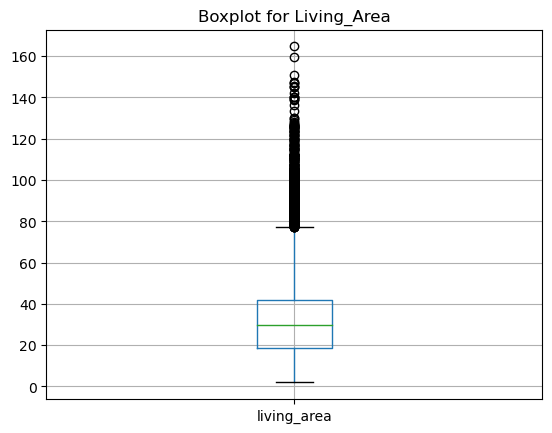

In [50]:
# построим график "ящик с усами", чтобы посмотреть выбросы

data.boxplot(column='living_area')
plt.title('Boxplot for Living_Area')
plt.show();

Из графика видно, что медиана расположена в районе 30 кв.м., а выше 80 кв.м. поднимается хвост выбросов. Оставим некоторое их количество, поскольку есть вероятность, что есть квартиры с такой большой жилой площадью, но все же удалим большую часть выбросов, чтобы они не столь сильно влияли на медиану и среднее значение.

Выполним удаление.

In [51]:
data = data.query('living_area <= 100')

Посмотрим размер получившегося датафрейма. Удален 181 объект.

In [52]:
data.shape

(23151, 28)

**Параметр "площадь кухни"**

In [53]:
# изучим параметр living_area (площадь кухни)
data['kitchen_area'].describe()

count    23151.000000
mean        11.436036
std          8.082411
min        -16.900000
25%          7.100000
50%          9.500000
75%         12.700000
max        169.900000
Name: kitchen_area, dtype: float64

В данном случае интересным представляется тот факт, что минимальное значение площади кухни выражено отрицательным числом. Нужно это изменить, поскольку это аномалия, вызванная, вероятно, технической неполадкой.

In [54]:
data['kitchen_area'] = data['kitchen_area'].abs()  # используем преобразование по модулю

Снова посмотрим описательную статистику. Видим, что отрицательных значений больше нет.

In [55]:
data['kitchen_area'].describe()

count    23151.000000
mean        11.442860
std          8.072745
min          0.000000
25%          7.100000
50%          9.500000
75%         12.700000
max        169.900000
Name: kitchen_area, dtype: float64

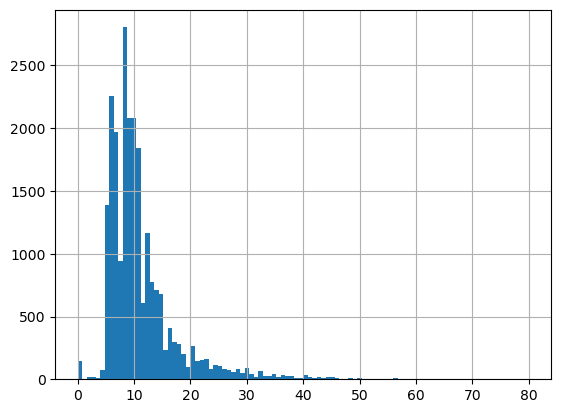

In [56]:
# построим гистограмму этого параметра
data['kitchen_area'].hist(bins=100, range=(0, 80));

Большая часть квартир имеют кухни от 5 до 15 кв.м., остальные площади представлены в меньшем количестве.

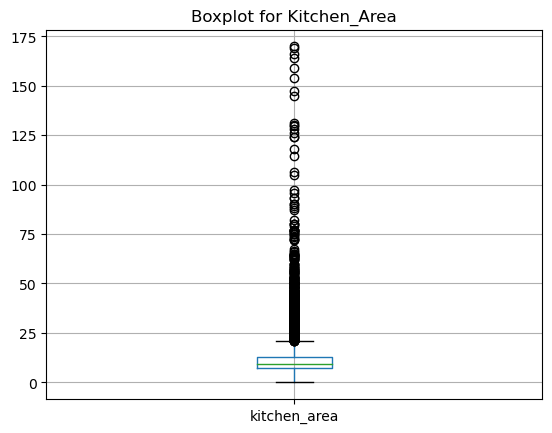

In [57]:
# построим график "ящик с усами", чтобы посмотреть выбросы

data.boxplot(column='kitchen_area')
plt.title('Boxplot for Kitchen_Area')
plt.show();

На этом графике очевидны выбросы, медиана проходит ближе к 10 кв.м., площадь кухни выше 20 кв.м представлена выбросами. Уберем часть выбросов, поскольку есть вероятность, что в объявлениях действительно были квартиры с очень большими кухнями.

Выполним удаление.

In [58]:
data = data.query('kitchen_area <= 30')

Посмотрим размер получившегося датафрейма. Удалено 630 объектов.

In [59]:
data.shape

(22521, 28)

**Параметр "цена объекта"**

In [60]:
# изучим параметр last_price (цена объекта)
data['last_price'].describe()

count    2.252100e+04
mean     5.592701e+06
std      4.529049e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.240000e+08
Name: last_price, dtype: float64

Значения очень большие. Приведем их в более привычный формат и посмотрим гистограмму.

In [61]:
# разделим каждое значение столбца на 1000

data['last_price'] = data['last_price'] / 1000

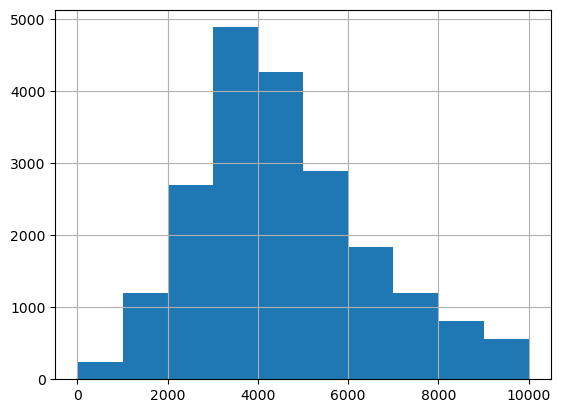

In [62]:
# построим гистограмму
data['last_price'].hist(bins=10, range=(10, 10000));

На гистограмме видно практически нормальное распределение. Видим, что стоимость большей части квартир составляет от 2 млн. руб. до 6 млн. руб, в самом большом количестве объявлений указана цена около 4 млн. руб.

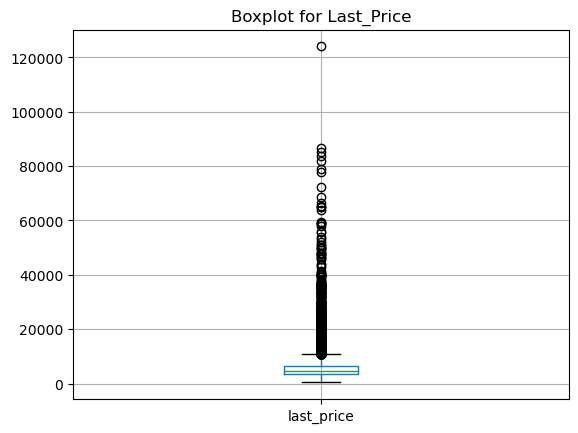

In [63]:
# построим график "ящик с усами", чтобы посмотреть выбросы

data.boxplot(column='last_price')
plt.title('Boxplot for Last_Price')
plt.show();

На этом графике виден хвост выбросов выше 10 млн. руб. Удалим квартиры со слишком высокой стоимостью, поскольку они редки и не отражают всей картины рынка недвижимости. Однако оставим часть объектов с высокой стоимостью, поскольку в таком крупном городе наверняка есть очень дорогие квартиры.

In [64]:
data = data.query('last_price <= 10000000')

Посмотрим размер получившегося датафрейма. Удалено 1907 объектов. Примерно 10 % от всех данных.

In [65]:
data.shape

(22521, 28)

**Параметр "количество комнат"**

In [66]:
# изучим параметр rooms (количество комнат)
data['rooms'].describe()

count    22521.000000
mean         1.989210
std          0.946255
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Медиана соответствует 2 комнатам, минимальное значение 0 комнат, вероятно, эти записи соответствуют квартирам-студиям. Проверим это.

In [67]:
temp_table = data.query('studio == True')
print(temp_table)

       total_images  last_price  total_area first_day_exposition  rooms  \
144               1      2450.0       27.00           2017-03-30      0   
440               8      2480.0       27.11           2018-03-12      0   
697              12      2500.0       24.10           2017-12-01      0   
716               5      1500.0       17.00           2017-06-07      0   
1173             12      3240.0       29.00           2018-10-30      0   
...             ...         ...         ...                  ...    ...   
22832             5      2600.0       28.00           2018-12-14      0   
22867             8      3090.0       30.00           2017-12-17      0   
22877             2      4280.0       28.00           2017-10-26      0   
23210             7      3200.0       26.00           2017-09-01      0   
23637             8      2350.0       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
144              2

Да, действительно, для квартир-студий количество комнат равно 0.

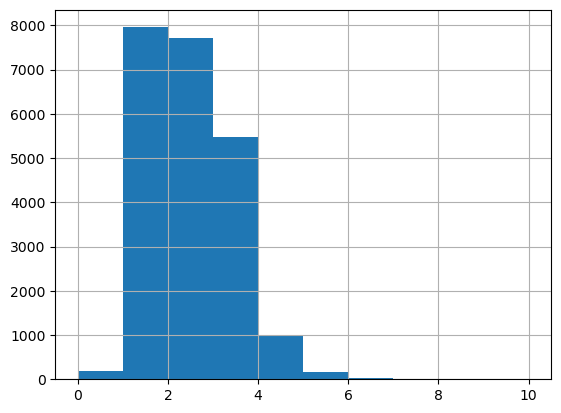

In [68]:
# построим гистограмму
data['rooms'].hist(bins=10, range=(0, 10));

Большинство квартир в объявлениях имеют по 1 - 2 комнаты, реже по 3 - 4, 5 и более комнат - редкость.

График "ящик с усами" в данном случае строить не будем, поскольку нет каких-то аномальных значений в данном столбце.

**Параметр "высота потолков"**

In [69]:
# изучим параметр ceiling_height (высота потолков)
data['ceiling_height'].describe()

count    22521.000000
mean         2.724934
std          1.014817
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Сразу бросается в глаза, что минимальная высота потолков составляет 1 м, а максимальная 32 метра, что явно является выбросами. Построим гистограмму.

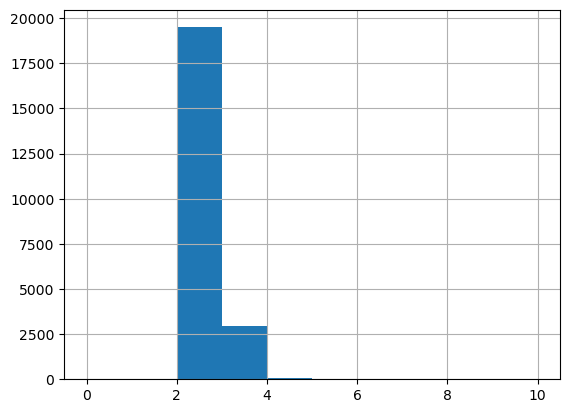

In [70]:
data['ceiling_height'].hist(bins=10, range=(0, 10));

Большинство квартир имеют потолки от 2 до 3 метров, небольшая доля квартир с потолками 3 - 4 метра. Проверим, сколько квартир имеют высоту потолков более 5 метров.

In [71]:
data.query('ceiling_height > 5').count().sum()

845

Как видно из полученных данных, 818 объектов имеют высоту потолков выше 5 метров. Выведем часть датафрейма для того, чтобы посмотреть такие записи.

In [72]:
data.query('ceiling_height > 5').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,category_by_floor,city_centers_nearest_km
355,17,3600.0,55.2,2018-07-12,2,25.00,5,32.000,2,False,False,False,23.200,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,65217.39,3,7,2018,Другой,NaN
397,15,5990.0,54.0,2018-03-22,2,14.85,36,21.400,28,False,False,False,18.700,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,110925.93,3,3,2018,Другой,20.0
3148,14,2900.0,75.0,2018-11-12,3,32.00,3,53.000,2,False,False,False,8.000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,38666.67,0,11,2018,Другой,NaN
3474,3,1400.0,30.0,2018-03-16,1,8.00,5,15.300,2,False,False,False,7.300,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,46666.67,4,3,2018,Другой,NaN
4643,0,4300.0,45.0,2018-02-01,2,25.00,9,30.000,2,False,False,False,7.000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,95555.56,3,2,2018,Другой,13.0
4876,7,3000.0,25.0,2017-09-27,0,27.00,25,17.000,17,False,False,True,8.000,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,120000.00,2,9,2017,Другой,NaN
5076,0,3850.0,30.5,2018-10-03,1,24.00,5,19.500,1,True,False,False,5.500,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,126229.51,2,10,2018,Первый,8.0
5246,0,2500.0,54.0,2017-10-13,2,27.00,5,30.000,3,False,False,False,9.000,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,46296.30,4,10,2017,Другой,NaN
5669,4,4400.0,50.0,2017-08-08,2,26.00,9,21.300,3,False,False,False,7.000,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0,88000.00,1,8,2017,Другой,11.0
5807,17,8150.0,80.0,2019-01-09,2,27.00,36,41.000,13,False,False,False,12.000,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,101875.00,2,1,2019,Другой,20.0


Значения высоты потолков выше 20 метров скорее всего имеют ошибку ввода. Скорее всего здесь необходимо указать вещественные числа. Напишем функцию, которая заменяет подобные значения.

In [73]:
def adjust_ceiling_height(value):
    if value > 20:
        return value / 10
    else:
        return value

data['ceiling_height'] = data['ceiling_height'].apply(adjust_ceiling_height)

Смотрим, что получилось.

In [74]:
data['ceiling_height'].describe()

count    22521.000000
mean         2.698754
std          0.287684
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         20.000000
Name: ceiling_height, dtype: float64

Снова смотрим, сколько квартир у нас имеет высоту потолков больше 5 метров. Их количество заметно сократилось.

In [75]:
data.query('ceiling_height > 5').count().sum()

320

Теперь проверим выбросы.

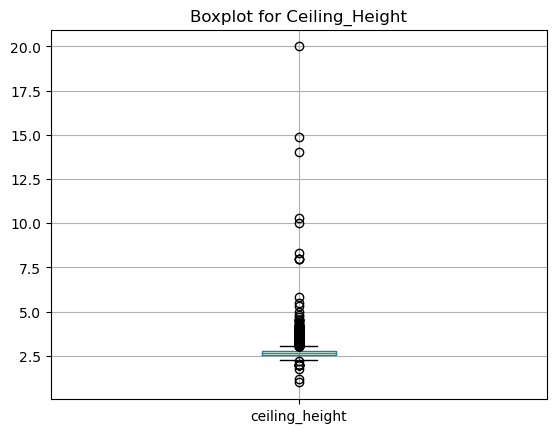

In [76]:
# построим график "ящик с усами", чтобы посмотреть выбросы

data.boxplot(column='ceiling_height')
plt.title('Boxplot for Ceiling_Height')
plt.show();

Можно смело удалить данные, представляющие выбросы, а именно квартиры с высотой потолков до 2 метров и выше 5 метров.

In [77]:
data = data.query('2 < ceiling_height < 5')

Проверим, сколько записей осталось в датафрейме.

In [78]:
data.shape

(22494, 28)

Осталось 20590 записей.

**Параметр "тип этажа квартиры («первый», «последний», «другой»)"**

In [79]:
# изучим параметр category_by_floor (тип этажа квартиры)
data['category_by_floor'].value_counts()

Другой       16532
Последний     3162
Первый        2800
Name: category_by_floor, dtype: int64

Здесь мы видим, что квартир на первом и последнем этажах в объявлениях примерно поровну, основная масса объявлений представлена квартирами на других этажах.

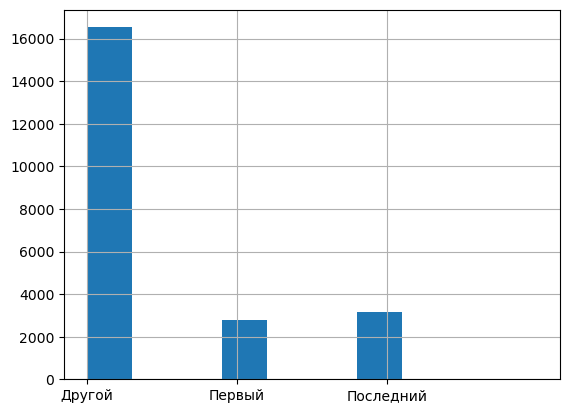

In [80]:
# построим гистограмму

data['category_by_floor'].hist(bins=10, range=(0, 3));

Гистограмма подтверждает наблюдения выше. График "ящик с усами" для категориальных значений построить нельзя.

**Параметр "общее количество этажей в доме"**

In [81]:
# изучим параметр floors_total (общее количество этажей в доме)
data['floors_total'].describe()

count    22494.000000
mean        10.728194
std          6.608479
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медианное значение представлено 9-этажками.

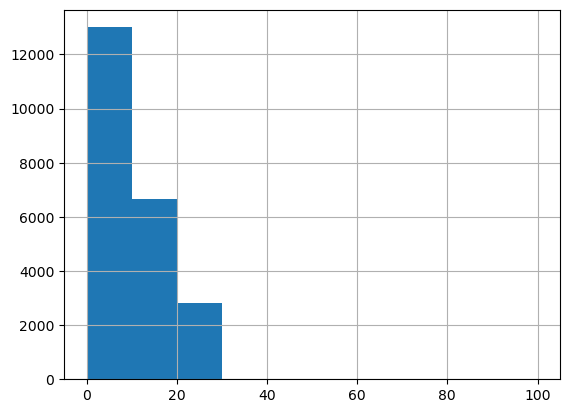

In [82]:
# построим гистограмму
data['floors_total'].hist(bins=10, range=(0, 100));

По гистограмме видно, что большее количество объявлений представлено квартирами в жилых домах с этажностью до 10 этажей, примерно в половину меньше квартир в жилых домах от 10 до 20 этажей, квартир в зданиях от 20 до 30 этажей меньше примерно в половину от предыдущего показателя. Небоскребы представлены в очень малом количестве. Поскольку медианное значение более чем правдоподобно, выбросы искать и обрабатывать не будем.

**Параметр "расстояние до центра города в метрах"**

In [83]:
# изучим параметр city_centers_nearest (расстояние до центра города в метрах)
data['city_centers_nearest'].describe()

count    17082.000000
mean     14489.017679
std       8574.361061
min        208.000000
25%       9798.000000
50%      13265.000000
75%      16445.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Поскольку ранее мы перевели метры в километры, будем работать со столбцом, в котором используются километры.

In [84]:
data['city_centers_nearest_km'].describe()

count    17082.000000
mean        14.482672
std          8.580667
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

Медианное значение представлено 13-ю километрами, минимальное значение 0, значит квартира располагается в центре, максимальное значение 66 км, скорее всего эти квартиры располагаются на окраине города.

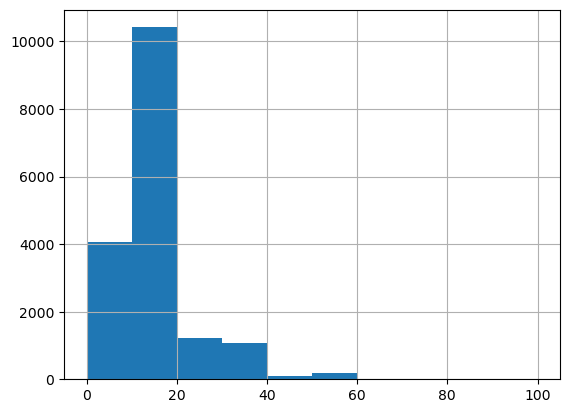

In [85]:
# построим гистограмму
data['city_centers_nearest_km'].hist(bins=10, range=(0, 100));

Большинство квартир располагается в радиусе 10 - 20 км от центра города, незначительное количество квартир находятся в центре или в непосредственной близости от него (менее 10 км), не столь значительное количество квартир располагается в удалении от центра.

В данном случае значения также вполне правдоподобны, выбросы искать и обрабатывать не будем.

**Параметр "расстояние до ближайшего парка"**

In [86]:
# изучим параметр parks_nearest (расстояние до ближайшего парка в метрах)

data['parks_nearest'].describe()

count    7426.000000
mean      490.604228
std       338.333379
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Есть квартиры в непосредственной близости от парков, достаточно большое количество квартир располагается в радиусе плюс/минус полукилометра от парков.

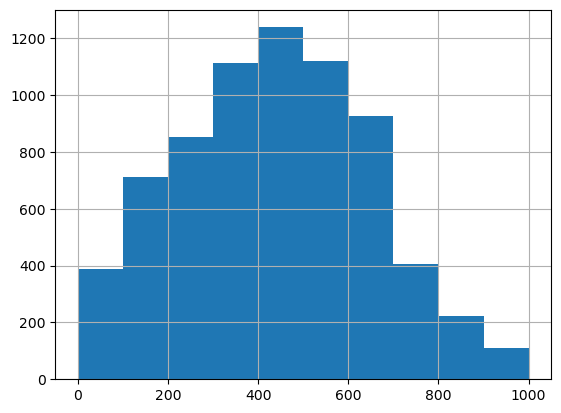

In [87]:
# построим гистограмму
data['parks_nearest'].hist(bins=10, range=(0, 1000));

Гистограмма подтверждает наблюдения выше: большинство квартир находятся на расстоянии 400 - 500 метров от парков. Большая доля квартир располагается в радиусе 200 - 700 метров. Остальные квартиры не могут похвастаться таким выгодным расположением. В данном случае также не будем искать и обрабатывать выбросы.

**Скорость продажи квартир** (`days_exposition`)

Изучим, как быстро продавались квартиры.

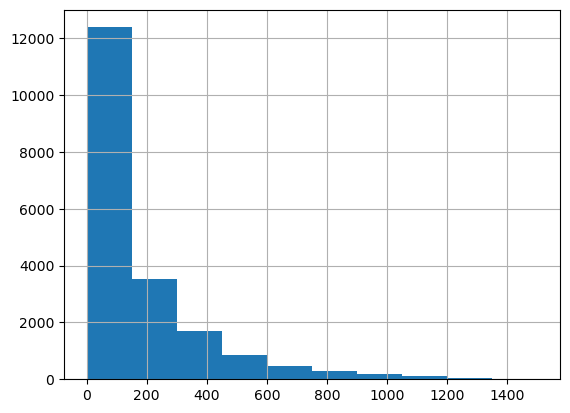

In [88]:
# построим гистограмму

data['days_exposition'].hist(bins=10, range=(0, 1500));

In [89]:
# вычислим среднее и медиану

print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())

Среднее значение: 177.69101410754448
Медианное значение: 94.0


Исходя из полученных данных, можно сделать вывод, что большинство квартир продается примерно в течение 4 мес., в среднем продажа занимает около 6 мес.

Посмотрим статистику, чтобы определить минимальное и максимальное значения дней размещения объявлений о продаже.

In [90]:
data['days_exposition'].describe()

count    19564.000000
mean       177.691014
std        215.976160
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

В данных представлены квартиры, которые продали за 1 день, а также есть необычайно долгие продажи, которые составили 4,3 года (1580 дней).

Интересно посмотреть распределение значений длительности размещения объявлений о продаже в пределах ~3 мес. Для этого построим гистограмму для диапазона значений от 1 до 100 дней.

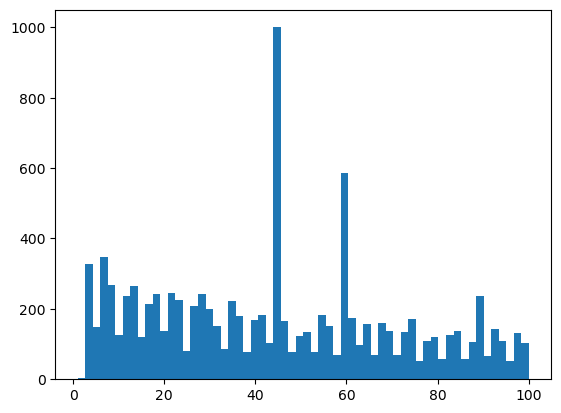

In [91]:
filtered_data = data[(data['days_exposition'] >= 1) & (data['days_exposition'] <= 100)]

# построим гистограмму для выбранных значений
plt.hist(filtered_data['days_exposition'], bins=60);

Диаграмма получилась пилообразная, с множеством падений и пиков. Вероятно, это связано в тем, что наиболее выгодные предложения продажи не задерживаются долго на прощадке объявлений, квартиры покупают быстро. Менее выгодные предложения задерживаются на публикации дольше, ожидая своего покупателя.

**Факторы, больше всего влияющие на общую (полную) стоимость объекта**

**Рассмотрим следующие факторы:**

* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* этаж, на котором расположена квартира (первый, последний, другой);
* дата размещения (день недели, месяц, год).

Посмотрим, зависит ли **цена от общей площади** квартиры.

0.7039427925813478

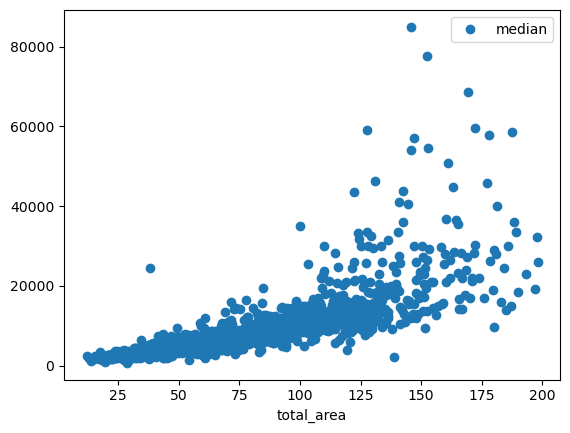

In [92]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y='median', style='o')

pivot_table_total_area.sort_values('median', ascending=False)

data['total_area'].corr(data['last_price'])

**Вывод:** как видно из графика, зависимость очень сильная (если провести прямую через точки, она идет вверх), да и корреляция Пирсона составляет с округлением до сотых `0.70`. То есть, чем больше площадь квартиры, тем выше ее стоимость. Есть объекты, которые отклоняются от общей тенденции, но здесь, вероятно, влияют такие факторы как год постройки, общее состояние квартиры и пр.

Посмотрим, зависит ли **цена от жилой площади** квартиры.

0.590895306139388

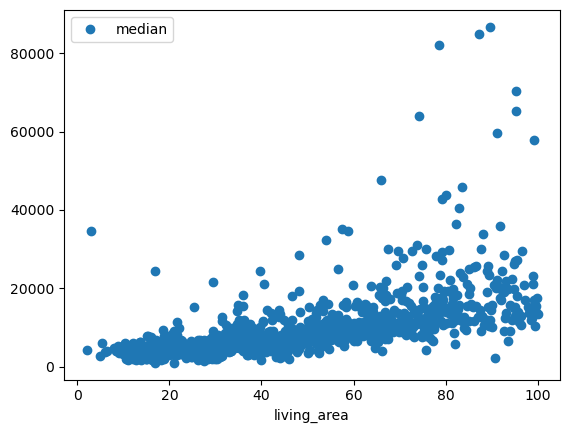

In [93]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y='median', style='o')

pivot_table_living_area.sort_values('median', ascending=False)

data['living_area'].corr(data['last_price'])

**Вывод:** как видно из графика, зависимость также достаточно сильная (если провести прямую через точки, она идет вверх), и корреляция Пирсона составляет с округлением до сотых `0.59`. То есть, чем больше жилая площадь квартиры, тем выше ее стоимость. Также есть объекты, которые отклоняются от общей тенденции, но здесь, вероятно, тоже влияют другие факторы.

Посмотрим, зависит ли **цена от площади кухни** в квартире.

0.3813475805134982

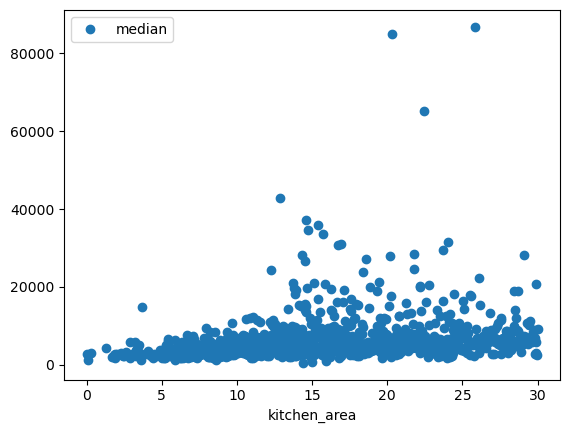

In [94]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y='median', style='o')

pivot_table_kitchen_area.sort_values('median', ascending=False)

data['kitchen_area'].corr(data['last_price'])

**Вывод:** как видно из графика, зависимость присутствует (если провести прямую через точки, она идет вверх), корреляция Пирсона составляет с округлением до сотых `0.38`. То есть цена квартиры в какой-то степени зависит от площади кухни.

Посмотрим, зависит ли **цена от количества комнат** в квартире.

0.41144356512384034

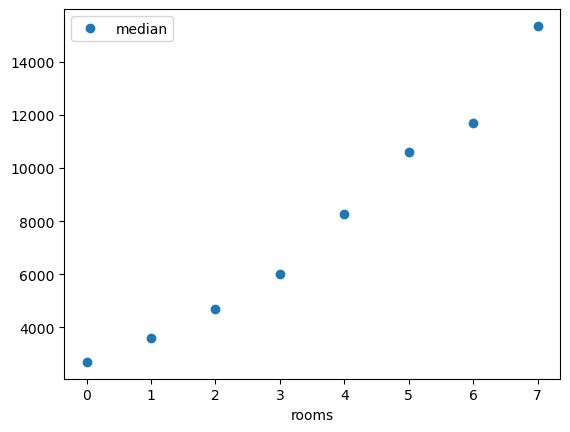

In [95]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y='median', style='o')

pivot_table_rooms.sort_values('median', ascending=False)

data['rooms'].corr(data['last_price'])

**Вывод:** как видно из графика, зависимость достаточно сильная (точки практически расположены на прямой), но корреляция Пирсона составляет с округлением до сотых `0.41`, то есть можно сделать вывод, что зависимость цены квартиры от количества комнат умеренная. В целом, чем больше комнат, тем выше стоимость квартиры в достаточном количестве объявлений.

Посмотрим, зависит ли **цена от этажа, на котором расположена квартира**.

,mean,count,median
category_by_floor,,,
Другой,5839.687730,16532,4700.0
Первый,4419.935915,2800,3850.0
Последний,5338.477825,3162,4180.0


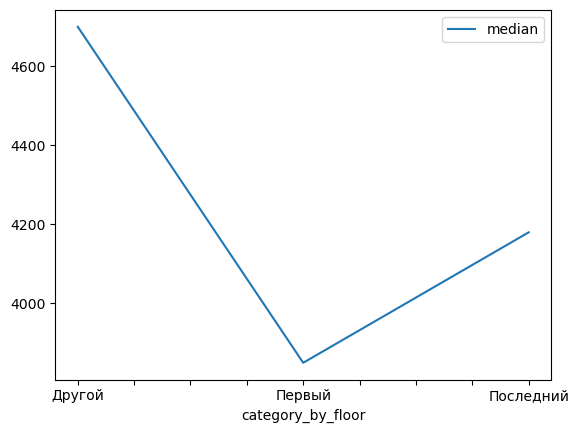

In [96]:
depend_on_floor_category = data.pivot_table(index = 'category_by_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
depend_on_floor_category.columns = ['mean', 'count', 'median']
depend_on_floor_category.plot(y='median')
depend_on_floor_category

**Вывод:** корреляцию Пирсона в данном случае посчитать невозможно, поскольку используется категориальная переменная. По графику можно сделать вывод, что квартиры на первом этаже самые дешевые, на последнем - дороже. Наибольшая стоимость у квартир на средних этажах. Тем не менее, стоит отметить, что квартиры на первом и последнем этажах присутствуют в выборке в гораздо меньшем количестве, поэтому и наблюдается такая разница в стоимости.

Посмотрим, зависит ли **цена от даты размещения** (день недели, месяц, год) объявления о продаже квартиры.

Зависимость **цены от дня недели** размещения объявления

,mean,count,median
day_exposition,,,
1,5694.937434,4000,4600.0
2,5563.130683,3754,4560.0
0,5571.910083,3432,4516.0
3,5799.269822,4062,4500.0
5,5441.879981,1837,4500.0
4,5487.931992,3809,4499.0
6,5346.479230,1600,4461.0


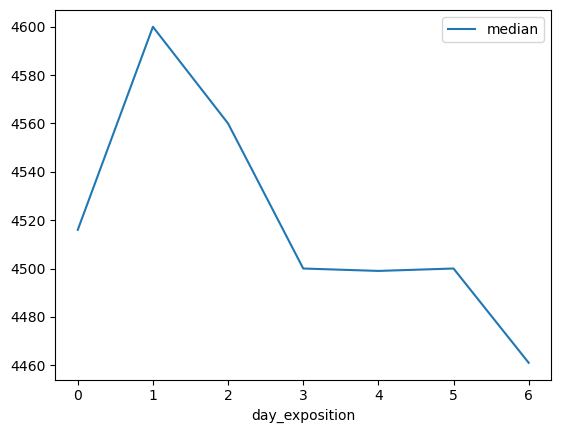

In [97]:
# понедельник — день под номером 0, а воскресенье — шестой день

weekday_exposition = data.pivot_table(index = 'day_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_exposition.columns = ['mean', 'count', 'median']
weekday_exposition.plot(y = 'median')

weekday_exposition.sort_values('median', ascending = False)

**Вывод:** как видно из графика, во вторник и среду выставляются самые дорогие квартиры; в четверг, пятницу и субботу цены снижаются; в понедельник цены самые низкие, а в воскресенье минимальны.

Зависимость **цены от месяца** размещения объявления

,mean,count,median
month_exposition,,,
4,5612.563502,2258,4700.0
9,5798.921688,1894,4600.0
11,5702.226841,2267,4600.0
3,5459.991599,2462,4550.0
12,5735.803216,1540,4550.0
2,5582.785316,2509,4530.0
1,5507.529865,1395,4500.0
8,5741.141703,1678,4500.0
10,5468.698416,2029,4500.0


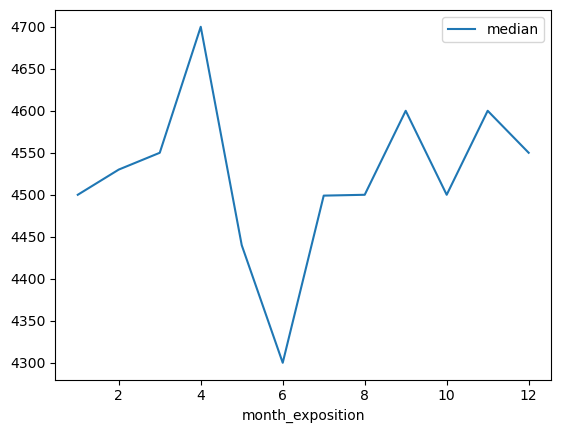

In [98]:
month_of_year_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_of_year_exposition.columns = ['mean', 'count', 'median']
month_of_year_exposition.plot(y = 'median')

month_of_year_exposition.sort_values('median', ascending = False)

**Вывод:** как видно из графика, самая высокая стоимость квартир в объявлениях, выложенных в апреле; чуть ниже стоимость в ноябрьских и мартовских объявлениях; самая низкая стоимость квартир появляется в июньских объявлениях; стоимость квартир в остальные месяцы примерно на одном уровне.

Зависимость **цены от года** размещения объявления

,mean,count,median
year_exposition,,,
2014,10278.863500,120,6775.0
2015,6642.132236,1070,5095.0
2019,5917.614337,2751,4950.0
2018,5346.582657,8140,4500.0
2016,5716.534950,2630,4400.0
2017,5476.324437,7783,4400.0


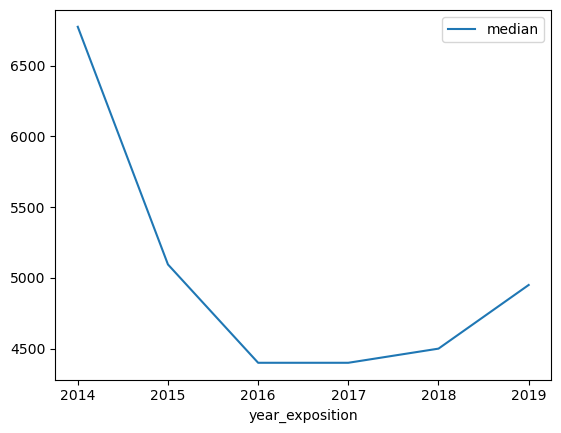

In [99]:
year_of_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_of_exposition.columns = ['mean', 'count', 'median']
year_of_exposition.plot(y = 'median')

year_of_exposition.sort_values('median', ascending = False)

**Вывод:** в датафрейме представлены объявления о продаже квартир с 2014 по 2019 год включительно. Самая высокая стоимость квартир наблюдалась в 2014 году, далее до 2016 года она плавно снижалась, в 2016 - 2017 годах держалась примерно на одном уровне, в 2017 - 2018 стала расти, и к 2019 году произошло резкое возрастание цены.

Теперь посчитаем **среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**. Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населенные пункты с самой высокой и низкой стоимостью квадратного метра.

In [100]:
loc_name_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
loc_name_pivot_table.columns = ['count', 'mean']
loc_name_pivot_table = loc_name_pivot_table.sort_values('count', ascending = False).head(10)
loc_name_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,14720,111515.305200
поселок Мурино,578,86231.492422
деревня Кудрово,465,95340.856645
поселок Шушары,425,78833.662965
Всеволожск,385,68781.848779
Пушкин,351,102604.360199
Колпино,335,75279.755403
поселок Парголово,317,90773.909464
Гатчина,305,68727.953541


In [101]:
# выберем из таблицы выше самую высокую стоимость из вычисленных средних по населеному пункту
loc_name_pivot_table[loc_name_pivot_table['mean'] == loc_name_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14720,111515.3052


In [102]:
# выберем из таблице выше самую низкую стоимость из вычисленных средних по населеному пункту
loc_name_pivot_table[loc_name_pivot_table['mean'] == loc_name_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,227,57862.236256


Для наглядности полученных данных построим столбчатую диагмамму.

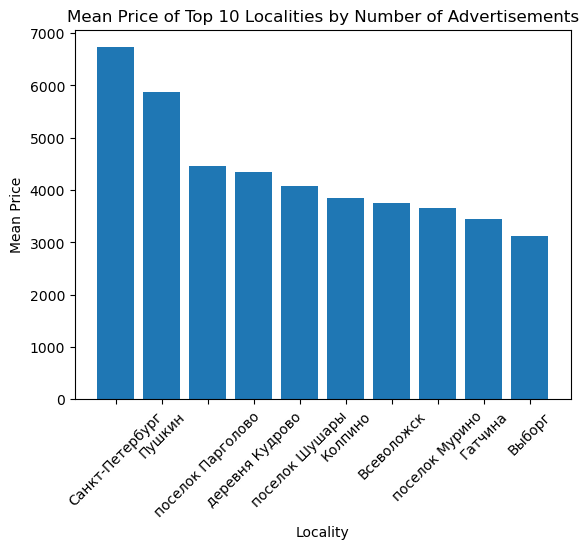

In [103]:
# создадим сводную таблицу с количеством и средней стоимостью 'price' по 'locality_name'
locality_name_pivot_table = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])
locality_name_pivot_table.columns = ['count', 'mean']

# отсортируем сводную таблицу по количеству объявлений в порядке убывания
locality_name_pivot_table = locality_name_pivot_table.sort_values('count', ascending=False)

# выберем топ 10 населенных пунктов по количеству объявлений
top_10_localities = locality_name_pivot_table.head(10)

# отсортируем топ 10 населенных пунктов по средней стоимости в порядке убывания
top_10_localities = top_10_localities.sort_values('mean', ascending=False)

# построим барплот для средней стоимости в топ 10 населенных пунктах
plt.bar(top_10_localities.index, top_10_localities['mean'])

# добавим подписи осей и заголовок графика
plt.xlabel('Locality')
plt.ylabel('Mean Price')
plt.title('Mean Price of Top 10 Localities by Number of Advertisements')

# повернем подписи оси x, чтобы они были более читаемыми
plt.xticks(rotation=45)
plt.show()

**Вывод:** самая высокая стоимость жилья из 10 населенных пунктов с наибольшим числом объявлений в Санкт-Петербурге, а самая низкая - в Выборге. Что в целом обусловлено статусом Санкт-Петербурга, "вторая столица". Выборг - очень маленький городок, всего 71 772 чел. (на 1 января 2023 г.), в таких населенных пунктах жилье обычно недорогое.

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим **среднюю цену каждого километра**. Определим, как стоимость объектов зависит от расстояния до центра города: построим график изменения средней цены для каждого километра от центра Санкт-Петербурга.

Расстояние расположения квартиры от центра города в километрах у нас зафиксировано в столбце `city_centers_nearest_km`. Будем работать с этим столбцом.

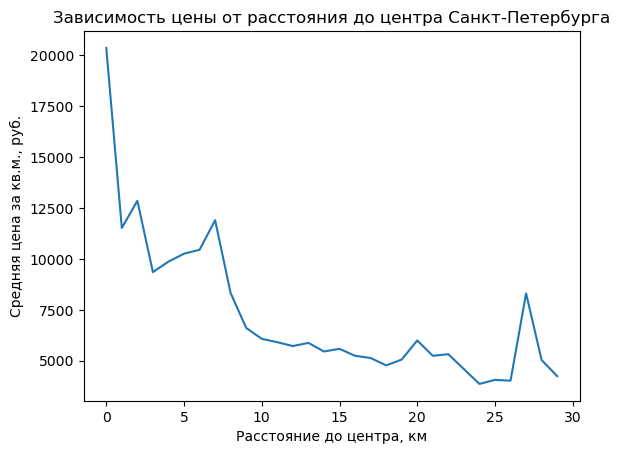

In [104]:
# выделим квартиры в Санкт-Петербурге
spb_flats = data[data['locality_name'] == 'Санкт-Петербург']

# группируем по расстоянию до центра города и вычислим среднюю цену для каждого километра
price_per_km = spb_flats.groupby('city_centers_nearest_km')['last_price'].mean()

# построим график изменения средней цены для каждого километра от центра Санкт-Петербурга
plt.plot(price_per_km.index, price_per_km.values)
plt.title('Зависимость цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за кв.м., руб.')
plt.show()

**Вывод:** чем дальше от центра города, тем ниже стоимость жилья. Однако можно наблюдать всплеск цен в радиусе 20 км от центра Санкт-Петербурга. Скорее всего такая ситуация наблюдается потому, что в масштабах такого крупного города не так и далеко, плюс центр города в Петербурге представлен старыми зданиями, не каждый захочет купить там жилье, а на расстоянии 18 - 20 км от центра города постройки новее, поэтому привлекательнее для потенциальных покупателей.

### Общий вывод

Для начала мы импортировали необходимые для работы библиотеки, открыли датафрейм и просмотрели его содержимое на примере нескольких начальных строк. Посмотрев на получившееся отображение таблицы, мы выяснили, что в данном датафрейме используется не стандартный разделитель для файлов `csv` (запятая), а символ табуляции`\t`. Поэтому для просмотра таблицы в привычном виде мы использовали параметр `sep='\t'`. Таблица стала отображаться в привычном пользователю формате.
Предоставленная таблица содержит 23699 строки и 22 столбца.

Далее мы ознакомились с типами данных в таблице и определили, что в данных присутствуют пропуски, которые в дальнейшем нужно будет обработать. Причины появления пропусков могут быть как техническими (данные были повреждены при формировании или выгрузке файла), так и возникнуть вследствие человеческого фактора (нежелание заполнять необязательные поля в объявлении). Некоторые пропуски, например в столбце `balcony`, отображающем количество балконов, могут означать, что в квартире балконов просто нет балконов. Также мы нашли некорректные именования столбцов (не соответствующих принятому формату `snake_case`), определили нелогичные типы данных (там где логично использовать целочисленные значения, в таблице используются вещественные), с этими аномалиями в данных мы будем работать. Следующим шагом мы построили гистограмму для всех числовых столбцов датафрейма на одном графике и определили некоторые особенности распределения данных. На этапе предобработки данных мы заменили названия столбцов на корректные в соответствии с принятым форматом `snake_case`, обработали пропуски в столбцах, где это возможно, удалили некоторые записи, которые не повлияют на анализ данных в целом, например это были записи с пропущенным названием населенного пункта. Большинство пропусков в столбцах было заполнено нулем, если это было уместно, или медианным значением. Для заполнения пропусков в столбце `kitchen_area` (площадь кухни) рассмотрели ситуацию для обычных квартир и квартир-студий: для студий площадь кухни заменили на ноль, поскольку пространство такой квартиры общее, а для обычных квартир вычли жилую площадь из общей площади квартиры, получив тем самым площадь кухни. Кроме того, в столбце `kitchen_area` были удалены отрицательные значения, которые, вероятней всего, возникли вследствие технической ошибки. Пропуски в столбце `is_apartment` были заменены на значение на `False`, поскольку скорее всего, если продавец такой недвижимости не указал, что она является апартаментами, значит это обычная квартира и апартаментами не является. Пропуски в столбце `days_exposition` мы не стали заполнять, поскольку они означают, что квартира не продана. В ходе знакомства с данными было замечено, что количество пропусков в столбце числа водоемов в радиусе 3 км равно количеству пропусков в столбце числа парков в радиусе 3 км. Из этого был сделан вывод, что водоемы и парки в радиусе 3 км отсутствуют единовременно. Мы предположили, что парков и водоемов в радиусе 3 км нет, поэтому заменили `NaN` на 0 в обоих столбцах. В картографических данных расстояний до парков, водоемов и аэропортов мы не заполняли пропуски, поскольку это невозможно выполнить достоверно. Далее мы обратили внимание на названия населенных пунктов в таблице. Мы нашли несколько населенных пунктов с разными вариантами написания, поэтому привели их названия к одному виду. Затем мы изменили типы данных в столбцах, где это было необходимо: тип данных в столбцах `balcony`, `floors_total`, `parks_around_3000` и `ponds_around_3000` изменили с вещественного на целочисленный, а тип данных даты публикации `first_day_exposition` изменили на тип `datetime64`. Явных дубликатов в датафрейме не обнаружено, а неявные (по названиям населенных пунктов) мы обработали ранее.

Далее мы приступили к этапу исследовательского анализа данных. В начале были добавлены некоторые необходимые для дальнейшей работы столбцы (`price_per_meter`, `day_exposition`, `month_exposition`, `year_exposition`). Также добавили столбец с категориями расположения квартир по этажам (значения этажей — "первый", "последний", "другой"), а расстояние до центра города перевели из метров в километры и округлили до ближайших целых значений. Далее мы изучили следующие параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах и расстояние до ближайшего парка, - и построили для них отдельные гистограммы. В некоторых параметрах встретились редкие и выбивающиеся значения. После построения графиков мы удалили их. Обработали аномалии в столбцах, если они присутствовали.

В ходе исследования было выявлено следующее. В большинстве объявлений продаются квартиры в многоэтажных домах (5 – 15 этажей), в незначительном количестве в объявлениях представлены небоскребы (до 60 этажей). Больше всего в объявлениях представлены квартиры общей площадью от 25 до 50 кв.м., значительная часть объявлений представлена квартирами от 75 до 100 кв.м, квартиры площадью 100 кв.м. имеются в продаже, а вот выше 125 кв.м - это уже редкость. Квартиры площадью 200 кв.м и больше представлены в единичных объявлениях. Большинство квартир в объявлениях имеют по 1 - 2 комнаты, реже по 3 - 4, 5 и более комнат - редкость.
Значительное количество выставленных на продажу квартир имеет жилую площадь около 20 кв.м., чуть меньше квартир - около 30 кв.м, представлено некоторое количество квартир площадью от 40 до 60 кв.м. Другие значения жилой площади представлены единичными квартирами.
Большая часть квартир имеют кухни от 5 до 15 кв.м., остальные площади представлены в меньшем количестве. Стоимость большей части квартир составляет от 2 млн. руб. до 6 млн. руб, в самом большом количестве объявлений указана цена около 4 млн. руб.
Большинство квартир имеют высоту потолков от 2 до 3 метров, небольшая доля квартир с потолками 3 - 4 метра. Везде в этих данных присутствуют выбросы (аномально низкие и аномально высокие значения), от части из них мы избавились, чтобы более объективно можно было оценить ситуацию на рынке недвижимости, часть данных с выбросами (например, по стоимости, площади, высоте потолков) были оставлены в работе, поскольку на самом деле могут быть такие дорогие объекты недвижимости с большими площадями и высокими потолками. Большинство квартир располагается в радиусе 10 - 20 км от центра города, незначительное количество квартир находятся в центре или в непосредственной близости от него (менее 10 км), не столь значительное количество квартир располагается в удалении от центра. Есть в продаже квартиры в непосредственной близости от парков (в 400 - 500 метрах). Большое количество квартир не могут похвастаться таким выгодным расположением. Если рассматривать длительность размещения объявлений о продаже квартир, то можно сделать вывод, что большинство квартир продается примерно в течение 4 мес., в среднем продажа занимает около 6 мес. В данных представлены квартиры, которые продали за 1 день, а также есть необычайно долгие продажи, которые составили 4,3 года.

В предоставленном датафрейме представлены объявления о продаже квартир с 2014 по 2019 год включительно. Самая высокая стоимость квартир наблюдалась в 2014 году, далее до 2016 года она плавно снижалась, в 2016 - 2017 годах держалась примерно на одном уровне, в 2017 - 2018 стала расти, и к 2019 году произошло резкое возрастание цены. На стоимость квартир значительное влияние оказывает площадь квартиры и количество комнат в ней, чем больше площадь и больше количество комнат, тем выше стоимость. Также очевидно, что чем больше жилая площадь квартиры, тем квартира дороже продается, площадь кухни также влияет на стоимость квартир. Квартиры на средних этажах стоят дороже, чем на первом или последнем этаже, однако квартиры на последнем этаже стоят несколько дороже квартир, расположенных на первом. Самые дорогие квартиры выставлялись на продажу во вторник и среду, в четверг, пятницу и субботу цены на квартиры в объявлениях о продаже несколько ниже, в понедельник продавцы не скупятся и выставляют стоимость квартир меньше, чем в другие дни недели, а в восресенье вообще наблюдаются самые низкие цены на квартиры. Самая высокая стоимость квартир отмечается в объявлениях, выложенных в апреле, чуть ниже стоимость в ноябрьских и мартовских объявлениях, самая низкая стоимость квартир появляется в июньских объявлениях, стоимость квартир в остальные месяцы примерно одинаковая. Если определить среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений, то самая высокая стоимость жилья за 1 кв.м. наблюдается в Санкт-Петербурге, а самая низкая - в Выборге. Что в целом обусловлено статусом Санкт-Петербурга, "вторая столица". Выборг - очень маленький городок, всего 71 772 чел. (на 1 января 2023 г.), в таких населенных пунктах жилье обычно недорогое. Чем дальше располагается квартира от центра города, тем ниже ее стоимость. Однако наблюдается всплеск цен в радиусе 20 км от центра Санкт-Петербурга. Скорее всего такая ситуация наблюдается потому, что в масштабах такого крупного города это не так и далеко от центра, плюс центр города в Петербурге представлен старым жилым фондом, не каждый захочет купить там жилье, а на расстоянии 18 - 20 км от центра города постройки новее, поэтому привлекательнее для потенциальных покупателей.
